![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [43]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
print(penguins_df.head())
print(penguins_df.isna().sum())
print(penguins_df.info())

   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g     sex
0              39.1             18.7              181.0       3750.0    MALE
1              39.5             17.4              186.0       3800.0  FEMALE
2              40.3             18.0              195.0       3250.0  FEMALE
3              36.7             19.3              193.0       3450.0  FEMALE
4              39.3             20.6              190.0       3650.0    MALE
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    float64
 3   body_mass_g        332 non-null    float64
 4   sex          

In [44]:
penguins_df=pd.get_dummies(penguins_df,columns=["sex"])
print(penguins_df.head(5))
print(penguins_df.info())

   culmen_length_mm  culmen_depth_mm  ...  sex_FEMALE  sex_MALE
0              39.1             18.7  ...           0         1
1              39.5             17.4  ...           1         0
2              40.3             18.0  ...           1         0
3              36.7             19.3  ...           1         0
4              39.3             20.6  ...           0         1

[5 rows x 6 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    float64
 3   body_mass_g        332 non-null    float64
 4   sex_FEMALE         332 non-null    uint8  
 5   sex_MALE           332 non-null    uint8  
dtypes: float64(4), uint8(2)
memory usage: 11.1 KB
None


In [45]:
scaler=StandardScaler()
X=scaler.fit_transform(penguins_df)

In [46]:
print(X)

[[-0.90390586  0.79035987 -1.42534179 -0.56694801 -0.99399394  0.99399394]
 [-0.83043377  0.12618674 -1.0685765  -0.50484747  1.00604235 -1.00604235]
 [-0.68348959  0.43272819 -0.42639899 -1.18795343  1.00604235 -1.00604235]
 ...
 [ 1.17168063 -0.74234736  1.50013355  1.91707363 -0.99399394  0.99399394]
 [ 0.21654349 -1.20215952  0.78660298  1.23396768  1.00604235 -1.00604235]
 [ 1.07984052 -0.53798639  0.85795603  1.48236985 -0.99399394  0.99399394]]


In [47]:
#Elbow analysis
inertia=[]
for k in range(1,10):
    kmeans=KMeans(n_clusters=k,random_state=42).fit(X)
    inertia.append(kmeans.inertia_)

print(inertia)
print(kmeans.labels_)

[1992.0000000000007, 1159.9635506619068, 695.197809547408, 383.46432033536416, 287.7481362875542, 216.06711783673342, 199.5254527295771, 183.60417224545944, 171.0464307821656]
[5 2 2 7 5 2 0 2 5 7 7 0 7 0 7 5 7 5 5 7 5 2 7 5 2 5 2 5 2 0 5 7 7 5 7 5 7
 0 2 0 5 7 0 2 5 7 0 7 5 2 5 2 5 2 0 2 5 2 5 2 5 2 0 7 5 2 0 7 0 2 5 2 0 2
 0 7 5 7 5 5 7 5 7 7 0 2 5 2 0 7 0 2 0 7 0 2 5 7 5 2 5 2 0 2 0 2 0 7 0 2 5
 2 5 2 5 2 0 2 0 2 0 2 0 2 0 7 0 2 5 2 0 2 5 2 5 2 5 2 5 5 7 7 5 2 0 6 4 4
 6 4 6 6 4 6 4 6 4 6 4 6 4 4 6 6 4 2 4 2 4 6 4 6 4 6 4 2 4 2 4 4 6 6 4 6 4
 4 6 4 6 6 4 6 4 4 6 6 4 6 4 2 4 6 4 4 6 4 6 6 4 6 4 4 6 1 3 1 8 8 1 1 8 1
 8 1 8 1 8 1 8 1 3 1 8 8 1 1 8 1 8 8 1 8 8 1 1 3 1 8 1 8 1 8 1 3 1 8 3 1 1
 3 1 8 1 8 1 8 1 8 1 8 1 3 1 8 1 3 1 3 3 1 3 1 8 8 1 1 3 1 3 1 8 1 3 1 3 1
 3 1 8 1 3 1 3 1 3 1 3 8 1 1 3 1 3 1 3 8 1 3 1 8 1 3 1 3 1 3 3 1 1 3 1 8]


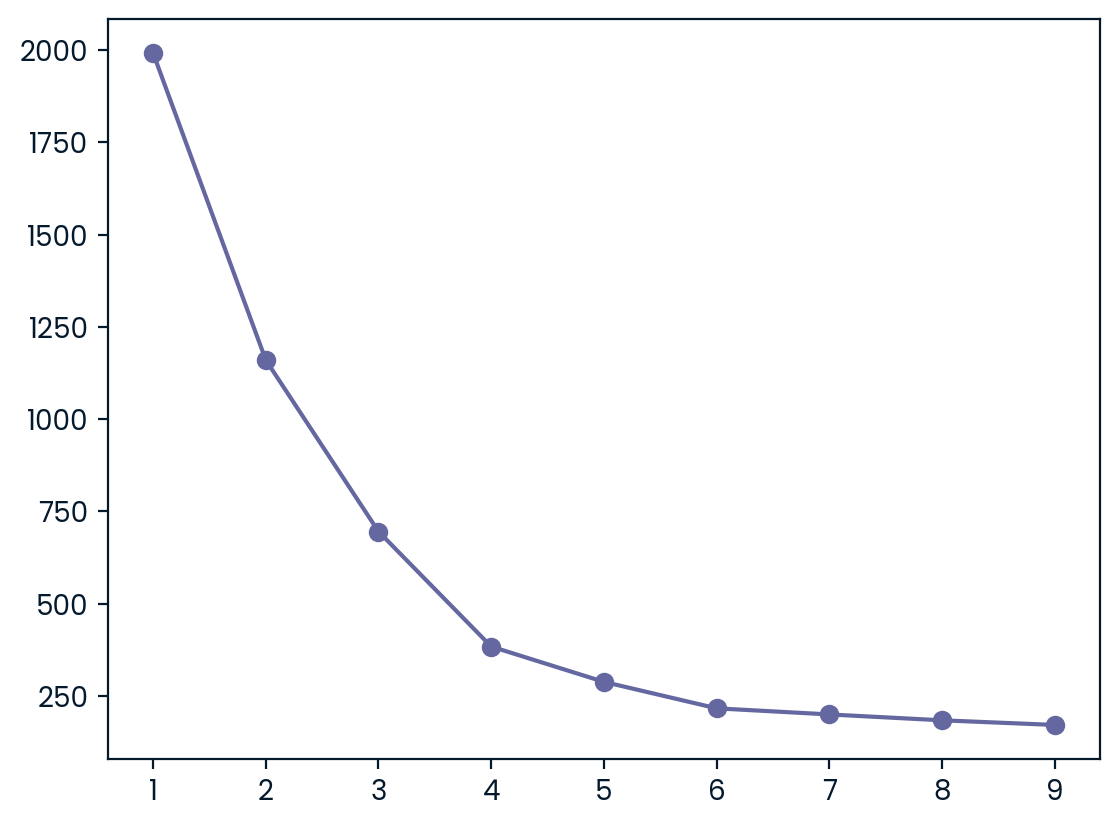

In [48]:
plt.plot(range(1,10),inertia,marker='o')
plt.show()

In [49]:
n_clusters=4
kmeans=KMeans(n_clusters=n_clusters,random_state=42).fit(X)
penguins_df['labels']=kmeans.labels_
print(penguins_df.head(5))
print(penguins_df.info())

   culmen_length_mm  culmen_depth_mm  ...  sex_MALE  labels
0              39.1             18.7  ...         1       0
1              39.5             17.4  ...         0       1
2              40.3             18.0  ...         0       1
3              36.7             19.3  ...         0       1
4              39.3             20.6  ...         1       0

[5 rows x 7 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    float64
 3   body_mass_g        332 non-null    float64
 4   sex_FEMALE         332 non-null    uint8  
 5   sex_MALE           332 non-null    uint8  
 6   labels             332 non-null    int32  
dtypes: float64(4), int32(1), uint8(2)
memory usage: 12.4 KB
None


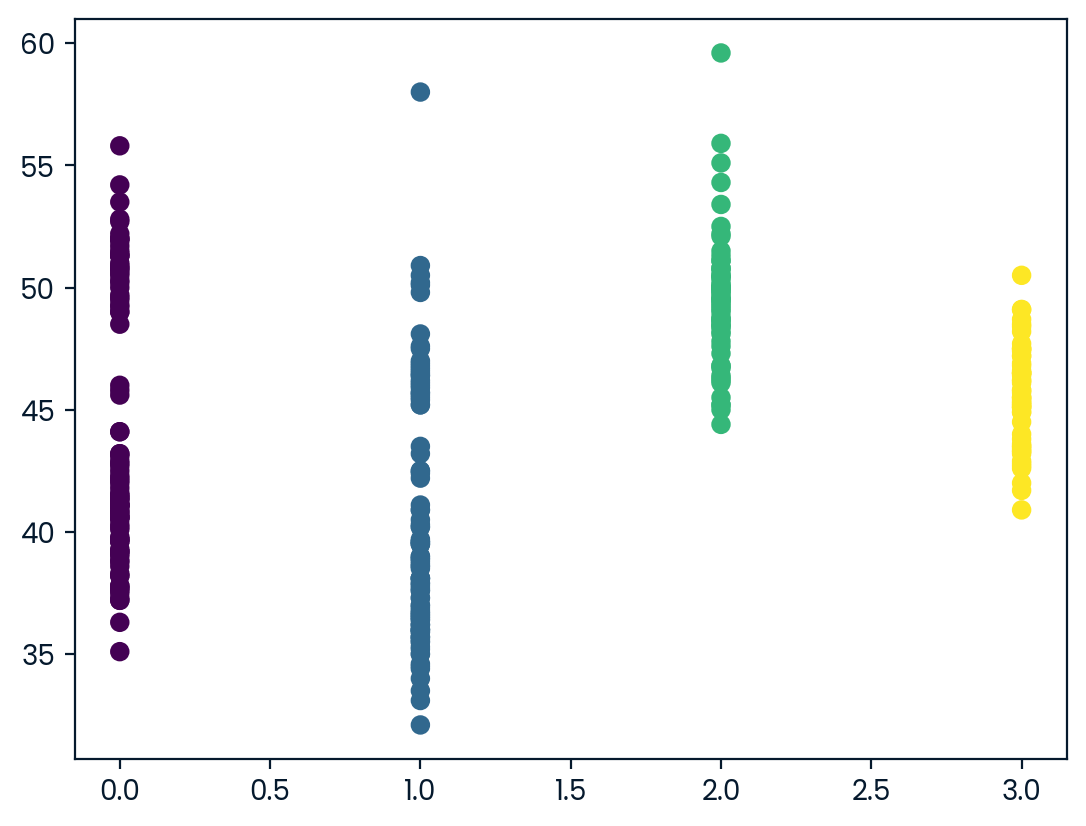

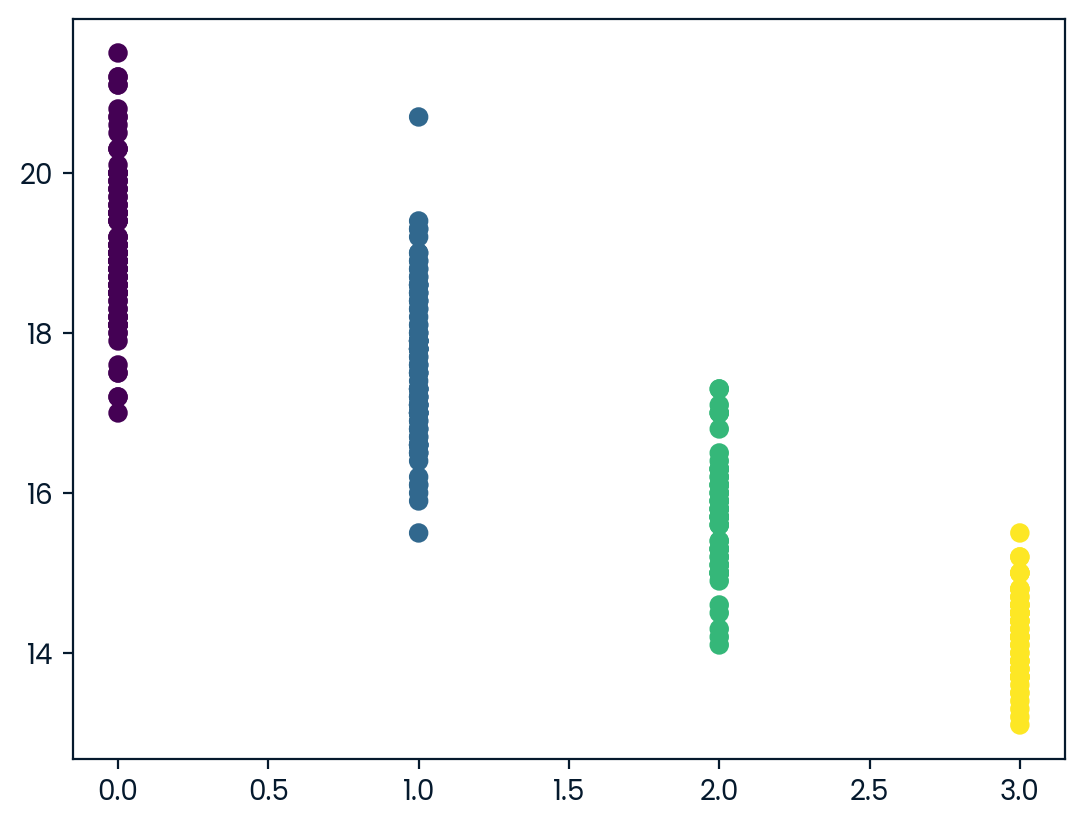

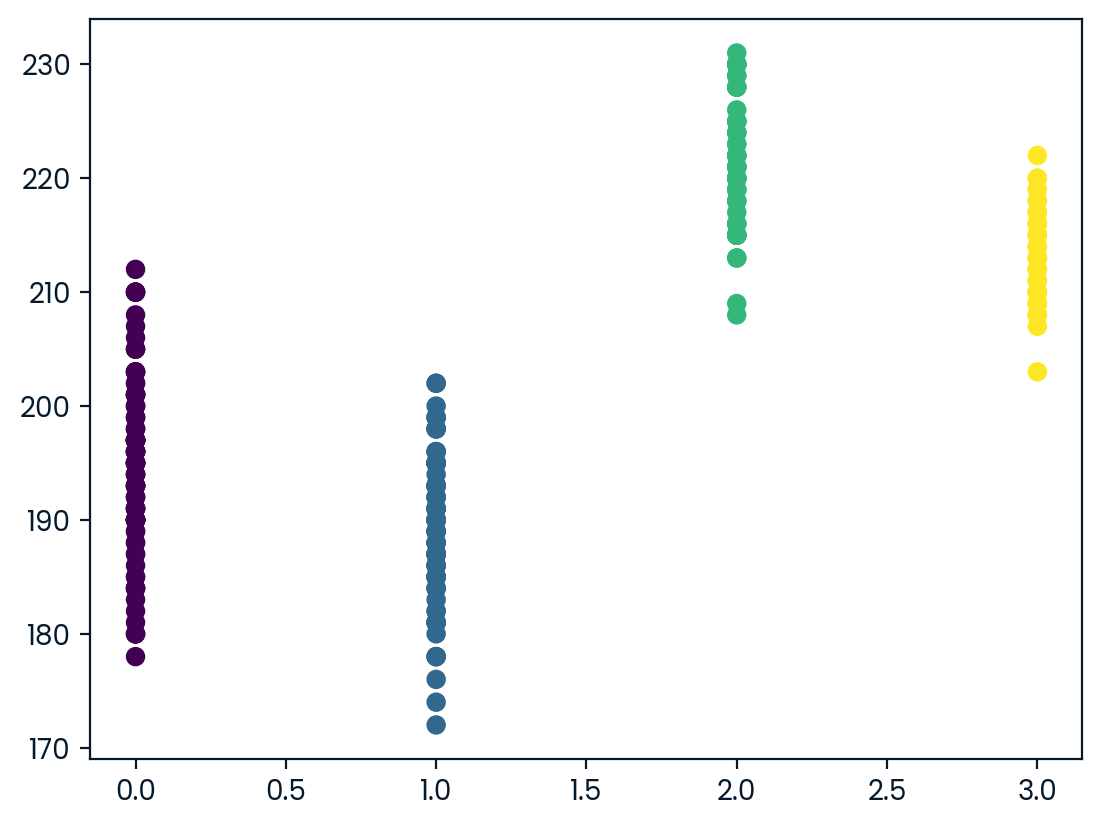

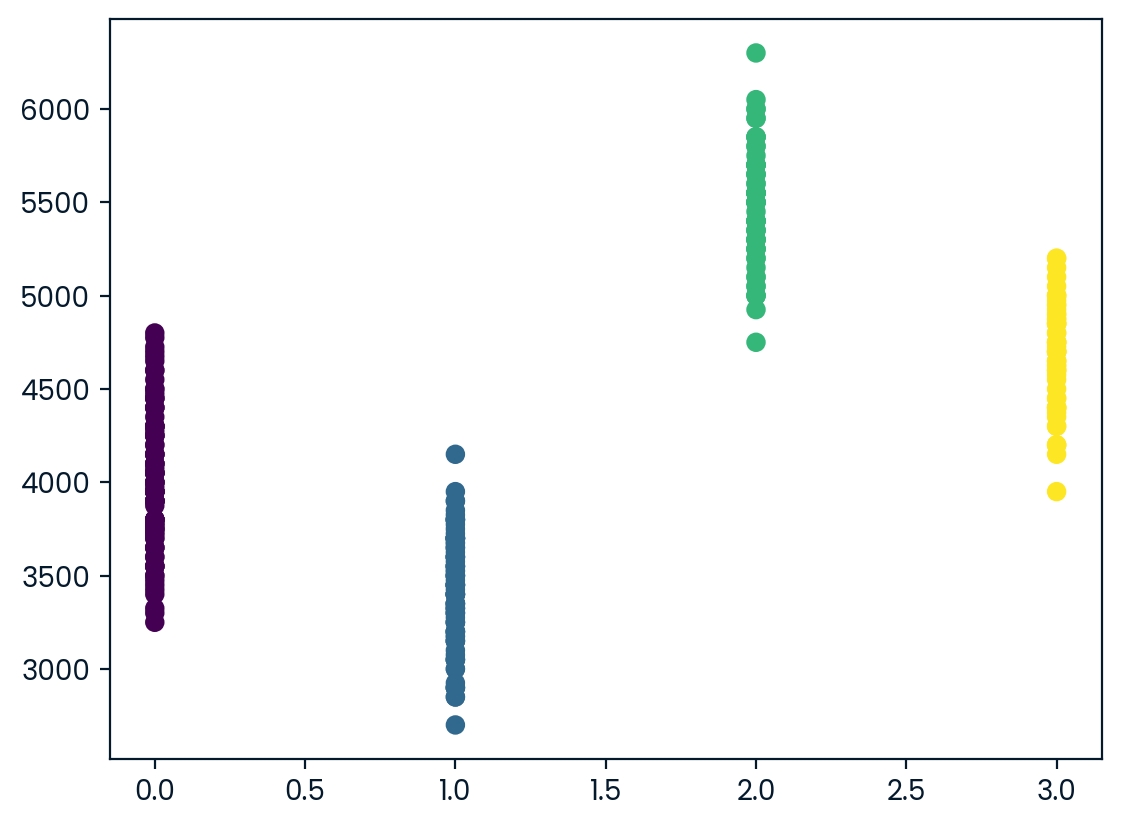

In [50]:
num_col=["culmen_length_mm","culmen_depth_mm","flipper_length_mm","body_mass_g"]
for col in num_col:
    plt.scatter(penguins_df["labels"],penguins_df[col],c=penguins_df["labels"])
    plt.show()

In [51]:
stat_penguins = penguins_df.groupby("labels")[num_col].mean()
print(stat_penguins)

        culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
labels                                                                   
0              43.878302        19.111321         194.764151  4006.603774
1              40.217757        17.611215         189.046729  3419.158879
2              49.473770        15.718033         221.540984  5484.836066
3              45.563793        14.237931         212.706897  4679.741379
